> UNICARIOCA - PÓS GRADUAÇÃO EM CIÊNCIA DE DADOS

> TRABALHO - ESTATÍSTICA APLICADA A NEGÓCIOS

> Grupo: Gabriel Rios de Carvalho, Ana Carolina Alves e Allan Vieira de Santana

>A planilha tx_bruta_mortalidade_rj.xlsx contém dados sobre a taxa bruta de 
mortalidade  os municípios do estado do Rio de Janeiro no período de 2000 a 2021. 

 EXERCÍCIO 1 - ANÁLISE EXPLORATÓRIA DE DADOS

>A - Leia o arquivo (está no AVA) para um Data Frame (DF) 

>B - Exiba as Estatísticas Descritivas do DF usando o DESCRIBE

>C - Calcule e armazene o vetor de médias por Município (media_mun) (92) e o 
vetor de médias por Ano (media_ano) (22)

>D - Realize uma Análise Exploratória de Dados para os vetores de médias por 
município e por ano (media_mun e media_ano)

>E - Determine os valores dos outliers para cada variável (media_mun e media_ano), Identifique e exiba os municípios e os anos que são outliers.

> F- Crie uma rotina para classificar a taxa média de mortalidade por município 
(media_mun) em 4 categorias (1-2-3-4) correspondentes aos quartis. 
Adicione esse indicador a última coluna do Data Frame original.

> G - Gere indicadores numéricos e gráficos que permitam avaliar a distribuição 
desse indicador. Lembre-se que é uma variável discreta… 

## A - Leitura do arquivo (tx_bruta_mortalidade_rj.xlsx) para DataFrame

---



In [ ]:
!pip install openpyxl --upgrade # SE FOR NECESSÁRIO
!pip install pandas --upgrade # SE FOR NECESSÁRIO

In [ ]:
from google.colab import files

arquivo = files.upload() # IMPORTAÇÃO DA PLANILHA COM OS DADOS DE TX DE MORTALIDADE BRUTA
nome=list(arquivo.keys())[0] # INSERE NOME DO ARQUIVO NA VARIÁVEL NOME

Saving tx_bruta_mortalidade_RJ.xlsx to tx_bruta_mortalidade_RJ.xlsx


In [ ]:
import io  # IO serve para lidar com vários tipos de E/S.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statistics as st
import math as mat
df = pd.read_excel(io.BytesIO(arquivo[nome])) #TRANSFORMA PLANILHA EM DATA FRAME
pd.set_option('display.float_format', lambda x: '%.3f' % x) #FORMATAR DF PARA EXIBIR APENAS TRÊS CASAS DECIMAIS

## B - Estatísticas Descritivas (Describe)


In [ ]:
df.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,92.000,92.000,92.000,92.000,92.000,92.000,92.000,92.000,92.000,92.000,...,92.000,92.000,92.000,92.000,92.000,92.000,92.000,92.000,92.000,92.000
mean,6.790,6.799,6.871,6.906,6.874,6.754,6.808,6.930,7.139,7.075,...,7.339,7.501,7.554,7.587,7.945,7.870,7.945,7.965,9.342,10.134
std,1.294,1.115,1.120,1.241,1.186,1.194,1.168,1.083,1.291,1.141,...,1.206,1.243,1.140,1.131,1.238,1.086,1.083,1.410,1.532,1.832
min,0.000,3.771,4.288,4.223,4.470,3.299,4.081,4.697,4.537,4.645,...,4.857,4.274,5.153,5.211,4.781,5.085,5.175,4.059,5.958,5.132
25%,6.182,5.956,6.115,6.023,6.281,5.916,5.839,6.021,6.429,6.498,...,6.592,6.783,6.846,6.835,7.184,7.266,7.358,7.134,8.373,9.048
50%,6.907,6.825,6.979,6.955,6.876,6.694,6.923,7.021,7.182,7.031,...,7.298,7.559,7.540,7.452,8.090,7.848,8.067,7.995,9.323,10.090
75%,7.599,7.727,7.472,7.808,7.661,7.479,7.672,7.651,7.779,7.732,...,8.097,8.218,8.198,8.247,8.802,8.586,8.563,8.929,10.208,11.286
max,9.355,8.957,9.512,11.131,11.242,10.778,9.874,10.092,13.016,11.804,...,10.515,12.853,11.394,11.275,10.727,10.848,11.661,11.693,13.787,14.565


# C - Calcule e armazene o vetor de médias por Município (media_mun) (92) e o vetor de médias por Ano (media_ano) (22)

In [ ]:
media_mun = df.mean ((1))  # CALCULA A MÉDIA POR LINHA (MUNICÍPIOS) // Parametro (1) calcula por LINHA
print("media_mun \n{}".format(media_mun)) #IMPRIME VETOR

media_mun 
0    5.299
1    7.363
2    7.906
3    7.194
4    6.364
      ... 
87   8.312
88   8.512
89   5.961
90   8.987
91   7.578
Length: 92, dtype: float64


<ipython-input-7-cfaf3af13d4a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  media_mun = df.mean ((1))  # CALCULA A MÉDIA POR LINHA (MUNICÍPIOS) // Parametro (1) calcula por LINHA


In [ ]:
media_ano = df.mean((0))  # CALCULA A MÉDIA POR COLUNA (ANO) // Parametro (0) calcula por COLUNA
print("media_ano \n{}".format(media_ano))  #IMPRIME VETOR

media_ano 
2000    6.790
2001    6.799
2002    6.871
2003    6.906
2004    6.874
2005    6.754
2006    6.808
2007    6.930
2008    7.139
2009    7.075
2010    7.272
2011    7.370
2012    7.339
2013    7.501
2014    7.554
2015    7.587
2016    7.945
2017    7.870
2018    7.945
2019    7.965
2020    9.342
2021   10.134
dtype: float64


<ipython-input-6-df88f5566fb5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media_ano = df.mean((0))  # CALCULA A MÉDIA POR COLUNA (ANO) // Parametro (0) calcula por COLUNA


## D - Realize uma Análise Exploratória de Dados para os vetores de médias por município e por ano

## Análise Numérica

In [ ]:
def analise_numerica(x):    # FUNÇÃO QUE RECEBE VETOR DE MÉDIAS E RETORNA ANÁLISE NUMÉRICA
  media = x.mean() # MÉDIA
  mediana = x.median()  # MEDIANA
  q1 = x.quantile(0.25) # 1º QUARTIL
  q2 = x.quantile(0.5) # 2º QUARTIL
  q3 = x.quantile(0.75) # 3º QUARTIL
  var = x.var() # VARIÂNCIA
  dp = x.std() # DESVIO PADRÃO
  cv = dp/media # COEFICIENTE DE VARIAÇÃO
  count = x.count() #TAMANHO DO VETOR
  
  print ("Média: " + str('%.3f' % media))
  print ("Mediana: " + str('%.3f' % mediana))
  print ("1º Quartil: " + str('%.3f' % q1))
  print ("2º Quartil: " + str('%.3f' % q2))
  print ("3º Quartil: " + str('%.3f' % q3))
  print ("Variância: " + str('%.3f' % var))
  print ("Desvio Padrão: " + str('%.3f' % dp))
  print ("Coeficiente de Variação: " + str('%.3f' % cv))
  print ("Tamanho do vetor: " + str(count))



### Por Município

In [ ]:
analise_numerica(media_mun) # ANÁLISE NUMÉRICA DAS MÉDIAS POR MUNICÍPIO

Média: 7.490
Mediana: 7.546
1º Quartil: 6.863
2º Quartil: 7.546
3º Quartil: 8.093
Variância: 1.028
Desvio Padrão: 1.014
Coeficiente de Variação: 0.135
Tamanho do vetor: 92


### Por Ano

In [ ]:
analise_numerica(media_ano) # ANÁLISE NUMÉRICA DAS MÉDIAS POR ANO

Média: 7.490
Mediana: 7.305
1º Quartil: 6.882
2º Quartil: 7.305
3º Quartil: 7.800
Variância: 0.714
Desvio Padrão: 0.845
Coeficiente de Variação: 0.113
Tamanho do vetor: 22


## Análise Gráfica



### Média por município

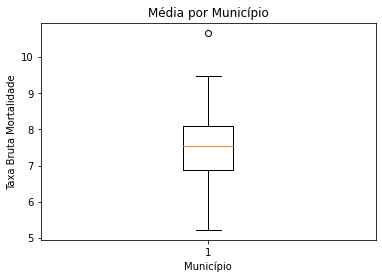

In [ ]:
plt.boxplot(media_mun)
plt.title('Média por Município')
plt.xlabel("Município")
plt.ylabel("Taxa Bruta Mortalidade")
plt.show()

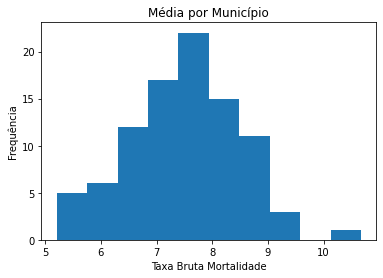

In [ ]:
plt.hist(media_mun)
plt.title('Média por Município')
plt.xlabel("Taxa Bruta Mortalidade")
plt.ylabel("Frequência")
plt.show()

### Média por ano

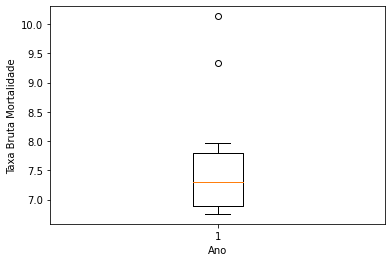

In [ ]:
plt.boxplot(media_ano)
plt.xlabel("Ano")
plt.ylabel("Taxa Bruta Mortalidade")
plt.show()

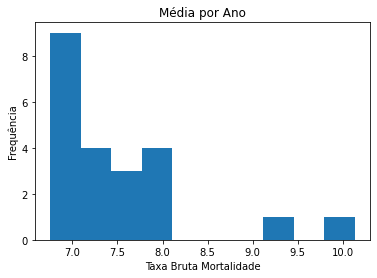

In [ ]:
plt.hist(media_ano)
plt.title('Média por Ano')
plt.xlabel("Taxa Bruta Mortalidade")
plt.ylabel("Frequência")
plt.show()

## Observações: 

> Com o Boxplot, os outliers ficam bem visíveis

> O Histograma facilita na visualização da média e do desvio padrão

> O Histograma é mais intuitivo do que o Boxplot






## E - Determine os valores dos outliers para cada variável (media_mun e media_ano), identifique e exiba os municípios e os anos que são outliers.


Variável media_ano

In [ ]:
def outliers (x):
  q1 = x.quantile(0.25) # 1º QUARTIL
  q3 = x.quantile(0.75) # 3º QUARTIL
  lim_inf = q1 - 1.5*(q3-q1)
  lim_sup = q3 + 1.5*(q3-q1)

  print("Limite Inferior (lim_inf): {:.3f}".format(lim_inf))
  print("Limite Superior (lim_sup): {:.3f}".format(lim_sup))
  print()
  print("OUTLIERS")
  for i in x.index:
      if (x.loc[i,] < lim_inf) or (x.loc[i,] > lim_sup):
         print("Ano: {:.4s}".format(i),"- Média: {:.3f}".format(x.loc[i,]))

outliers(media_ano)

Limite Inferior (lim_inf): 5.506
Limite Superior (lim_sup): 9.176

OUTLIERS
Ano: 2020 - Média: 9.342
Ano: 2021 - Média: 10.134


Variável media_mun

In [ ]:
def outliers (x):
  q1 = x.quantile(0.25) # 1º QUARTIL
  q3 = x.quantile(0.75) # 3º QUARTIL
  lim_inf = q1 - 1.5*(q3-q1)
  lim_sup = q3 + 1.5*(q3-q1)

  print("Limite Inferior (lim_inf): {:.3f}".format(lim_inf))
  print("Limite Superior (lim_sup): {:.3f}".format(lim_sup))
  print()
  print("OUTLIERS")
  for i in x.index:
      if (x.loc[i,] < lim_inf) or (x.loc[i,] > lim_sup):
        print("Município: {:}".format(df.loc[i,'Município']), "- Média: {:.3f}".format(media_mun[i]))

outliers(media_mun)

Limite Inferior (lim_inf): 5.019
Limite Superior (lim_sup): 9.938

OUTLIERS
Município: Macuco - Média: 10.671



## F - Crie uma rotina para classificar a taxa média de mortalidade por município (media_mun) em 4 categorias (1-2-3-4) correspondentes aos quartis. Adicione esse indicador a última coluna do Data Frame original.


In [94]:
q1 = media_mun.quantile(0.25) # 1º QUARTIL
q2 = media_mun.quantile(0.5)  # 2º QUARTIL
q3 = media_mun.quantile(0.75) # 3º QUARTIL
q4 = media_mun.quantile(1)    # 4º QUARTIL
diferenca = q4-q1

print('Primeiro quartil ', q1)
print('Segundo quartil', q2)
print('Terceiro quartil ', q3)
print('Quarto quartil', q4)
print('Diferença interquartílica ', diferenca)
print()
q1_vet = []
q2_vet = []
q3_vet = []
q4_vet = []

tabela_nova = []

for x in media_mun.values:
    if x <= q1:
        #print(f"{x} pertence ao q1 ")
        q1_vet.append(x)
        tabela_nova.append("q1")
    elif q1 < x <= q2:
        #print(f"{x} pertence ao q2")
        q2_vet.append(x)
        tabela_nova.append("q2")
    elif q2 < x <= q3:
        #print(f"{x} pertence ao q3")
        q3_vet.append(x)
        tabela_nova.append("q3")
    else:
        #print(f"{x} pertence ao q4")
        q4_vet.append(x)
        tabela_nova.append("q4")

df['quartile'] = tabela_nova
print(df)
print()

Primeiro quartil  6.863482015598585
Segundo quartil 7.546078370975058
Terceiro quartil  8.09311207521863
Quarto quartil 10.670853047328585
Diferença interquartílica  3.80737103173

             Município  2000  2001  2002  2003  2004  2005  2006  2007  2008  \
0       Angra dos Reis 4.688 5.494 5.456 4.961 4.921 5.461 4.899 4.804 5.050   
1              Aperibé 6.461 8.036 7.586 5.600 6.337 7.577 5.741 6.030 7.106   
2             Araruama 6.646 6.817 6.897 6.696 7.772 6.699 7.303 7.616 7.920   
3                Areal 5.727 5.337 6.973 5.741 7.142 5.397 7.675 6.954 7.484   
4   Armação dos Búzios 5.960 4.814 4.288 5.061 5.419 5.500 5.666 5.510 5.552   
..                 ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
87           Três Rios 7.157 7.824 8.125 7.960 8.061 8.411 7.381 7.838 7.647   
88             Valença 7.591 7.857 8.718 8.087 8.352 7.723 7.990 7.809 8.585   
89           Varre-Sai 8.089 4.376 5.952 5.485 6.525 5.284 5.636 5.761 6.737   
90           Vassou


## G - Gere indicadores numéricos e gráficos que permitam avaliar a distribuição desse indicador. Lembre-se que é uma variável discreta… 

             Município quartile
0       Angra dos Reis       q1
1              Aperibé       q2
2             Araruama       q3
3                Areal       q2
4   Armação dos Búzios       q1
..                 ...      ...
87           Três Rios       q4
88             Valença       q4
89           Varre-Sai       q1
90           Vassouras       q4
91       Volta Redonda       q3

[92 rows x 2 columns]

Tamanho de Q1: 23
Tamanho de Q2: 23
Tamanho de Q3: 23
Tamanho de Q4: 23



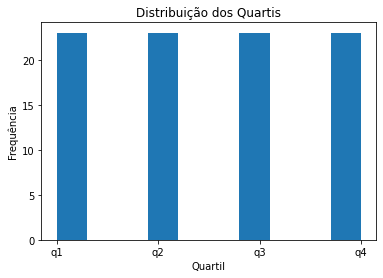

In [109]:
import plotly.express as px
tabela_q = df[['Município','quartile']]

print (tabela_q) # IMPRESSÃO DA TABELA COM OS MUNICÍPIOS E OS QUARTIS RESPECTIVOS
print()

print("Tamanho de Q1:",len(q1_vet)) # QUANTIDADE DE MÚNICÍPIOS COM O INDICADOR Q1 
print("Tamanho de Q2:",len(q2_vet)) # QUANTIDADE DE MÚNICÍPIOS COM O INDICADOR Q2 
print("Tamanho de Q3:",len(q3_vet)) # QUANTIDADE DE MÚNICÍPIOS COM O INDICADOR Q3 
print("Tamanho de Q4:",len(q4_vet)) # QUANTIDADE DE MÚNICÍPIOS COM O INDICADOR Q4 
print()

plt.hist(df['quartile'])
plt.title('Distribuição dos Quartis')
plt.xlabel("Quartil")
plt.ylabel("Frequência")
plt.show()

print()

grafico = px.box(tabela_q, x=tabela_q['Município'], y=tabela_q['quartile']) # GRÁFICO DE DISPERSÃO DOS QUARTIS
grafico.show()

EXERCÍCIO 2: AMOSTRAGEM 
> Contexto: considere como população de interesse o vetor de médias por município media_mun [92].

> Assim, são conhecidas a Média e a Variância da População.

> Crie uma rotina para extrair amostras aleatórias simples usando como parâmetros: variável, fração amostral, e a sinalização (sem/com reposição).

> Após cada chamada da rotina devem ser impressos Média e Variância da População e da Amostra selecionada para cada chamada. 

In [ ]:
def amostra_simples(x,fr,reposicao): # FUNÇÃO PARA CRIAR UMA AMOSTRA ALEATÓRIA
  if (reposicao == True):
    x_sample = x.sample(frac=fr, replace = True)  # COM REPOSIÇÃO 
  else:
    x_sample = x.sample(frac=fr, replace = False) # SEM REPOSIÇÃO

  global media_amostra, var_amostra, media_populacao, var_populacao, tam_amostra, dp_amostra, dp_populacao
  media_amostra = x_sample.mean() # MÉDIA DA AMOSTRA
  var_amostra = x_sample.var()    # VARIÂNCIA DA AMOSTRA
  media_populacao = x.mean()      # MÉDIA DA POPULAÇÃO
  var_populacao = x.var()         # VARIÂNCIA DA POPULAÇÃO
  dp_amostra = x_sample.std()     # DESVIO PADRÃO DA AMOSTRA
  dp_populacao = x.std()          # DESVIO PADRÃO DA POPULAÇÃO
  tam_amostra = x_sample.count()  #TAMANHO DA AMOSTRA
   
  print("Média Amostra:", '%.3f' % media_amostra)
  print("Média População:", '%.3f' % media_populacao)
  print("Variância Amostra:", '%.3f' % var_amostra)
  print("Variância População:", '%.3f' % var_populacao)
  print()


  
amostra_simples(media_mun, 0.1, False) #EXEMPLO 1 (AMOSTRA ALEATÓRIA SIMPLES SEM REPOSIÇÃO DE 10%)
amostra_simples(media_mun, 0.8, True) #EXEMPLO 2 (AMOSTRA ALEATÓRIA SIMPLES COM REPOSIÇÃO DE 80%)
amostra_simples(media_mun, 1, False) #EXEMPLO 3 (AMOSTRA ALEATÓRIA SIMPLES SEM REPOSIÇÃO DE 100% == POPULAÇÃO)


Média Amostra: 7.338
Média População: 7.490
Variância Amostra: 0.698
Variância População: 1.028

Média Amostra: 7.408
Média População: 7.490
Variância Amostra: 1.129
Variância População: 1.028

Média Amostra: 7.490
Média População: 7.490
Variância Amostra: 1.028
Variância População: 1.028



EXERCÍCIO 3: INTERVALO DE CONFIANÇA
> Determine um intervalo de confiança para a média populacional com nível de 
confiança (alfa = 95%) para uma amostra aleatória simples com reposição selecionada com fração amostral = 20%.

> Use a rotina do item anterior para gerar a amostra e achar a média amostral.
> Lembre que a variância da População e seu Desvio padrão são conhecidos 
> Logo … distribuição Normal



In [ ]:
import scipy.stats
def intervalo_confianca(nc): # FUNÇÃO PARA CALCULAR INTERVALO DE CONFIANÇA
  global z
  z = abs(scipy.stats.norm.ppf((1 - nc)/2.)) #CALCULO DO Z

  IC1 = media_amostra - z*dp_populacao/np.sqrt(tam_amostra) # LIMITE INFERIOR
  IC2 = media_amostra + z*dp_populacao/np.sqrt(tam_amostra) # LIMITE SUPERIOR

  print ("Intervalo de Confiança:", [IC1,IC2])

In [ ]:
amostra = amostra_simples(media_mun, 0.2, True) # AMOSTRA COM REPOSIÇÃO E FRAÇÃO AMOSTRAL 20%
intervalo_confianca(0.95) # INTERVALO DE CONFIANÇA DE 95%

Média Amostra: 7.665
Média População: 7.490
Variância Amostra: 0.949
Variância População: 1.028

Intervalo de Confiança: [7.196684011816916, 8.133441370617335]


4 - INFERÊNCIA

> Qual o erro de estimativa para a média da população (u) usando a amostra do item anterior? 

In [ ]:
erro = z*dp_populacao/np.sqrt(tam_amostra) # FÓRMULA PARA CÁLCULO DO ERRO UTILIZANDO AMOSTRA ANTERIOR
print ("Erro:", erro)

Erro: 0.46837867940021


> Faça o cálculo do erro de estimação para amostras extraídas com várias frações amostrais diferentes. 
A teoria se confirma?

In [ ]:
amostra_1 = amostra_simples(media_mun, 0.4, True) # AMOSTRA COM REPOSIÇÃO E FRAÇÃO AMOSTRAL DE 40%
intervalo_confianca(0.95) # INTERVALO DE CONFIANÇA DE 95%
erro = z*dp_populacao/np.sqrt(tam_amostra)
print ("Erro:", erro)

Média Amostra: 7.814
Média População: 7.490
Variância Amostra: 0.840
Variância População: 1.028

Intervalo de Confiança: [7.487607586308515, 8.140982572527188]
Erro: 0.3266874931093366


In [ ]:
amostra_2 = amostra_simples(media_mun, 0.6, True) # AMOSTRA COM REPOSIÇÃO E FRAÇÃO AMOSTRAL DE 60%
intervalo_confianca(0.95) # INTERVALO DE CONFIANÇA DE 95%
erro = z*dp_populacao/np.sqrt(tam_amostra)
print ("Erro:", erro)

Média Amostra: 7.670
Média População: 7.490
Variância Amostra: 1.539
Variância População: 1.028

Intervalo de Confiança: [7.402443186680902, 7.938341044770928]
Erro: 0.2679489290450132


In [ ]:
amostra_3 = amostra_simples(media_mun, 0.8, True) # AMOSTRA COM REPOSIÇÃO E FRAÇÃO AMOSTRAL DE 80%
intervalo_confianca(0.95) # INTERVALO DE CONFIANÇA DE 95%
erro = z*dp_populacao/np.sqrt(tam_amostra)
print ("Erro:", erro)

Média Amostra: 7.477
Média População: 7.490
Variância Amostra: 1.058
Variância População: 1.028

Intervalo de Confiança: [7.246352119267105, 7.708358002679996]
Erro: 0.2310029417064454


Considerações Finais:

1 - Quanto maior o nível de confiança, maior a amplitude do intervalo de confiança

2 - Quanto maior o tamanho da amostra, menor o erro